# <center> Customer Lifetime Value Prediction - Credit Card Users </center>
<center> Spring 2023, Yuxuan Yang </center>

## Table of contents
1. [What is Customer Lifetime Value?](#clv)
1. [Why is Customer Lifetime Value Important?](#why)
1. [How machine learning helps?](#how)
1. [Data Cleaning](#data_cleaning)
1. [Feature Engineering](#feature_engineering)
    - [Step 1 - Encode Categorical Feature](#encode)
    - [Step 2 - Feature Scaling](#scaling)
    - [Step 3 - Feature Selection and Importance Chart](#feature_selection)
1. [Predictive Modeling](#approach1)
    - [Step 1 - Split Dataset](#split)
    - [Step 2 - Model Training](#training)
        - [Model 1 - Ridge Model](#ridge)
        - [Model 2 - Gradient Boosting](#gb)
        - [Model 3 - Neural Network](#nn)
    - [Step 3 - Model Selection](#selection)

## What is Customer Lifetime Value (CLV)? <a name="clv"></a>

- Customer Lifetime Value (CLV) is a marketing metric that estimates the total amount of revenue a business can expect to generate from a customer over the entire duration of their relationship with the business. It is a prediction of the total value a customer will bring to a business over the course of their relationship, taking into account their purchasing behavior, buying frequency, and customer retention.

- CLV is an important metric for businesses to measure because it helps to quantify the long-term value of their customers, and allows them to make informed decisions about how much to invest in acquiring new customers versus retaining existing customers. By understanding the expected lifetime value of a customer, businesses can optimize their marketing and customer retention strategies, and allocate their resources more effectively.

- To calculate CLV, businesses need to consider a variety of factors, including the average purchase value, the frequency of purchases, the customer retention rate, and the length of the customer relationship. There are different methods and models that can be used to calculate CLV, such as the historic CLV, predictive CLV, and customer segmentation-based CLV.

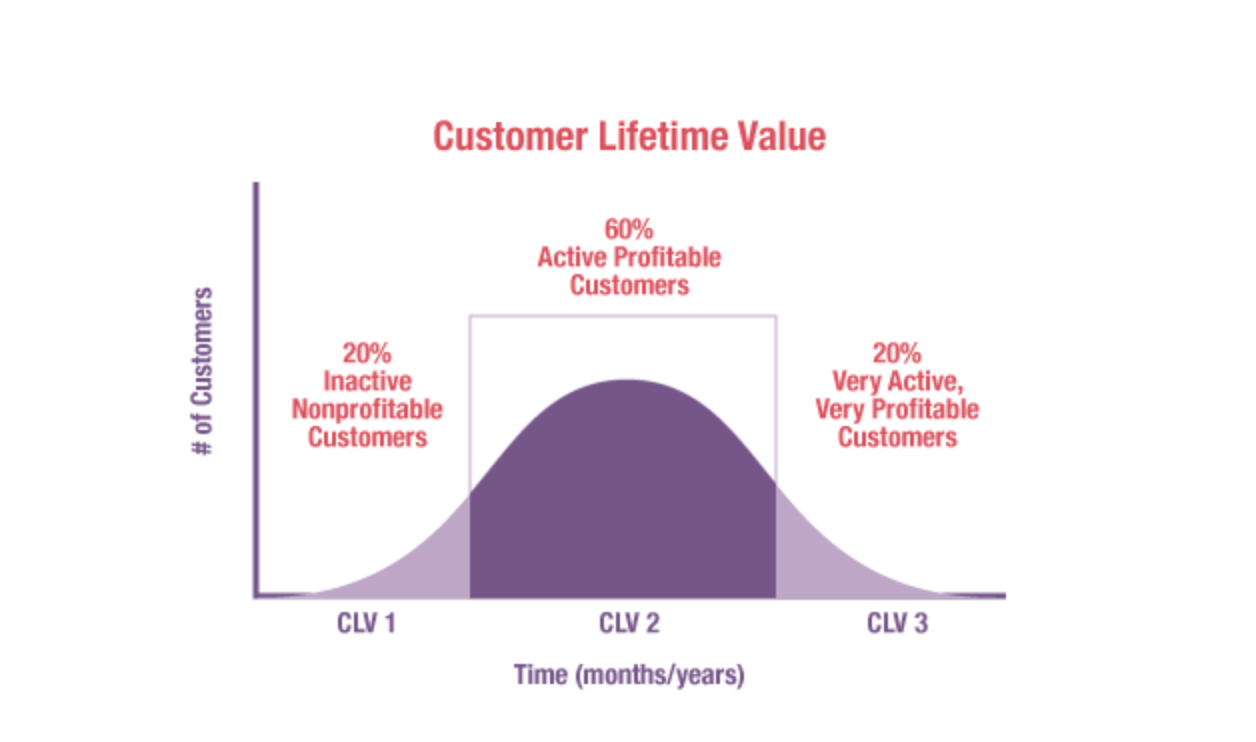

## Why is Customer Lifetime Value Important? <a name="why"></a>

Customer Lifetime Value (CLV) is an important metric for businesses for several reasons:

1. Helps to quantify the long-term value of customers: By calculating the expected lifetime value of a customer, businesses can determine the potential revenue that can be generated from a customer over the entire duration of their relationship with the business. This information can help businesses to make informed decisions about how much to invest in acquiring and retaining customers.

1. Helps to prioritize customer acquisition and retention strategies: Businesses can use CLV to identify their most valuable customers and prioritize their customer acquisition and retention strategies accordingly. By focusing on retaining high-value customers, businesses can increase their revenue and profitability over time.

1. Helps to optimize marketing spend: CLV can help businesses to determine the amount of money they can invest in customer acquisition activities such as advertising and promotions, and still generate a positive return on investment (ROI). This information can help businesses to optimize their marketing spend and allocate their resources more effectively.

1. Helps to improve customer satisfaction and loyalty: By understanding the needs and preferences of their most valuable customers, businesses can tailor their products and services to meet their needs and improve their overall customer experience. This can help to increase customer satisfaction and loyalty, and ultimately increase customer lifetime value.

Overall, CLV is an important metric for businesses as it helps them to understand the value of their customers and make informed decisions about their marketing, customer acquisition, and retention strategies. By focusing on increasing CLV, businesses can improve their revenue and profitability over the long-term.

## How machine learning helps? <a name="how"></a>

Machine learning can be used to predict customer lifetime value (CLV) by analyzing customer behavior and identifying patterns and trends that can be used to make predictions about future purchasing behavior.

One common approach is to use predictive modeling techniques such as regression analysis, decision trees, or neural networks to develop a predictive model based on historical customer data. This model can be trained to identify patterns in the data that are associated with high CLV customers, and then use those patterns to predict the CLV of new or existing customers.

For example, a business could use historical customer data to train a machine learning model to predict the CLV of new customers based on their demographics, purchase history, and other relevant factors. The model could then be used to identify which customers are likely to have high CLV, and the business could target its marketing and customer retention strategies accordingly.

Overall, machine learning can be a powerful tool for predicting CLV by analyzing large amounts of data and identifying patterns and trends that might not be immediately apparent to humans. By leveraging machine learning techniques, businesses can improve their customer targeting, increase their revenue, and improve their overall profitability over time.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Clearning <a name="data_cleaning"></a>

In [117]:
#here we load the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('clv.csv')

#and immediately I would like to see how this dataset looks like
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [118]:
df.info() ## No Missing Value -- we do not need to check null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [119]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [120]:
df.describe(include='O')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [121]:
#Let's see what the options are in the text columns with two or three options (the objects)
for col in df.columns:
    if df[col].dtype == 'O':
        print(f'{col}: '+ str(df[col].unique()))

Customer: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
State: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Response: ['No' 'Yes']
Coverage: ['Basic' 'Extended' 'Premium']
Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date: ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender: ['F' 'M']
Location Code: ['Subur

In [122]:
##Step1 - check duplicated
df[df.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [123]:
##Step2 - correct data format
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

<ipython-input-123-e1eeb1b74ec9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])


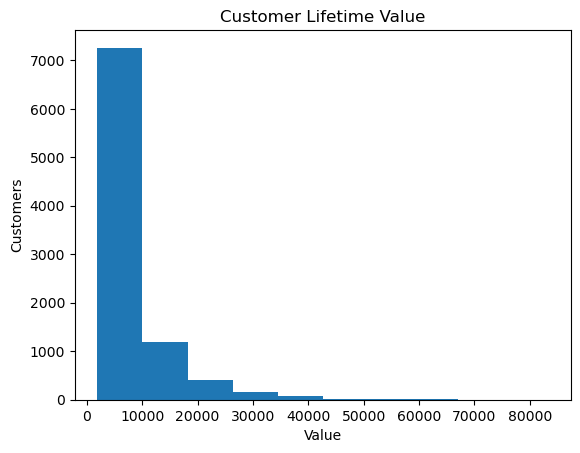

In [124]:
#Step3 - Outlier Detection
%matplotlib inline
plt.hist(df['Customer Lifetime Value'], bins = 10)
plt.title("Customer Lifetime Value") #Assign title 
plt.xlabel("Value") #Assign x label 
plt.ylabel("Customers") #Assign y label 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc924fe23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc924fe2ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc924fe20d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc924fee1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc924fee520>],
 'means': []}

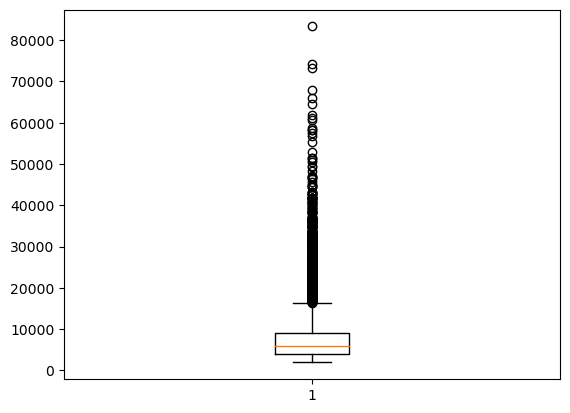

In [125]:
plt.boxplot(data['Customer Lifetime Value'])

In [126]:
##remove outliers
Q1,Q3 = np.percentile(df['Customer Lifetime Value'],[25,75])
IQR = Q3 - Q1
ul = Q3+3*IQR
ll = Q1-3*IQR
outliers = df.loc[(df['Customer Lifetime Value'] > ul) | (df['Customer Lifetime Value'] < ll),'Customer Lifetime Value']
df = df.drop(outliers.index)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8767 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       8767 non-null   object        
 1   State                          8767 non-null   object        
 2   Customer Lifetime Value        8767 non-null   float64       
 3   Response                       8767 non-null   object        
 4   Coverage                       8767 non-null   object        
 5   Education                      8767 non-null   object        
 6   Effective To Date              8767 non-null   datetime64[ns]
 7   EmploymentStatus               8767 non-null   object        
 8   Gender                         8767 non-null   object        
 9   Income                         8767 non-null   int64         
 10  Location Code                  8767 non-null   object        
 11  Marital Status        

In [128]:
#Step4 - check skewness
df['Customer Lifetime Value'].skew()

1.5211973412126636

(array([2364., 2559., 1564.,  951.,  393.,  341.,  220.,  140.,  124.,
         111.]),
 array([ 1898.007675 ,  4089.5589585,  6281.110242 ,  8472.6615255,
        10664.212809 , 12855.7640925, 15047.315376 , 17238.8666595,
        19430.417943 , 21621.9692265, 23813.52051  ]),
 <BarContainer object of 10 artists>)

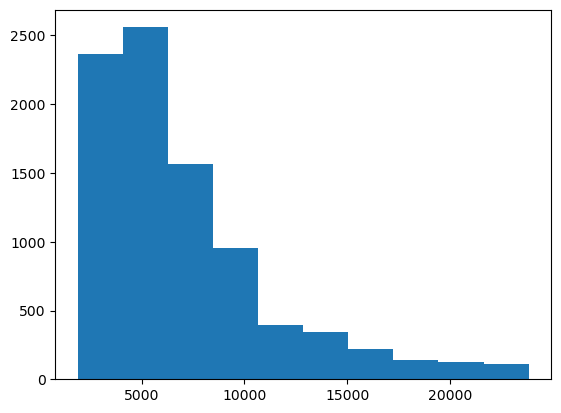

In [129]:
y = df['Customer Lifetime Value']
plt.hist(y)

In [130]:
df['Customer Lifetime Value'] = np.log1p(df['Customer Lifetime Value'])

In [131]:
df['Customer Lifetime Value'].skew()

0.23964465298305224

(array([ 369., 1246.,  721., 1461., 1365., 1494.,  887.,  543.,  382.,
         299.]),
 array([ 7.54908675,  7.80198316,  8.05487956,  8.30777596,  8.56067236,
         8.81356877,  9.06646517,  9.31936157,  9.57225797,  9.82515438,
        10.07805078]),
 <BarContainer object of 10 artists>)

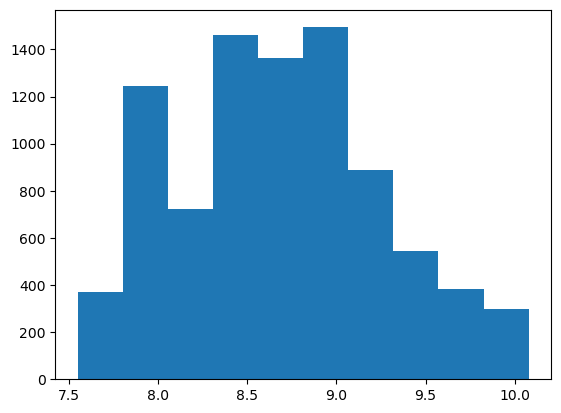

In [132]:
y = df['Customer Lifetime Value']
plt.hist(y)

## Feature Engineer<a name="feature_engineer"></a>

In [133]:
#First we drop the customer column, as this is a unique identifier and will bias the model
df = df.drop(labels = ['Customer'], axis = 1)

##### Step1 - Encode Categorical Feature: When dealing with a large number of categorical features, one-hot encoding may lead to a multi-dimensional problem. In such cases, ordinal encoding can be a better method to handle categorical features. <a name="encode"></a>

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [135]:
column_names = ['Response', 'Coverage', 'Education', 
                     'Effective To Date', 'EmploymentStatus', 
                     'Gender', 'Location Code', 'Marital Status',
                     'Policy Type', 'Policy', 'Renew Offer Type',
                     'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'State']

for col in column_names:
    df[col] = le.fit_transform(df[col])
    
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,7.924622,0,0,0,54,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,8.850881,0,1,0,30,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,9.464085,0,2,0,49,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,8.942051,0,0,0,19,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,7.942608,0,0,0,33,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [136]:
df.dtypes

State                              int64
Customer Lifetime Value          float64
Response                           int64
Coverage                           int64
Education                          int64
Effective To Date                  int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Renew Offer Type                   int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class                      int64
Vehicle Size                       int64
dtype: object

In [138]:
df.describe()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,1.740618,8.681109,0.143721,0.472339,1.550473,28.848295,1.833466,0.492529,37606.847610,0.977415,1.123988,91.910802,15.119311,47.979126,0.387704,3.005817,0.824455,3.793088,0.975134,1.100148,427.691654,1.875784,1.087145
std,1.287197,0.572487,0.350826,0.652226,1.380969,16.967101,1.351555,0.499973,30449.737501,0.605655,0.635499,33.060492,10.053457,27.876081,0.918117,2.430525,0.476320,1.606038,1.007647,1.069887,284.507971,2.086640,0.537380
min,0.000000,7.549087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,1.000000,8.265647,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,1.000000,1.000000,68.000000,6.000000,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,268.471802,0.000000,1.000000
50%,1.000000,8.634210,0.000000,0.000000,1.000000,28.000000,1.000000,0.000000,33871.000000,1.000000,1.000000,81.000000,14.000000,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,377.422029,0.000000,1.000000
75%,3.000000,9.056689,0.000000,1.000000,3.000000,43.500000,4.000000,1.000000,62296.500000,1.000000,2.000000,108.000000,23.000000,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,542.400000,4.000000,1.000000
max,4.000000,10.078051,1.000000,2.000000,4.000000,58.000000,4.000000,1.000000,99981.000000,2.000000,2.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


##### Step2 - Feature Scaling<a name="scaling"></a>

In [141]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
                    'Number of Open Complaints','Number of Policies','Total Claim Amount']

# create the scaler object
scaler = StandardScaler()

# fit the scaler to the selected features
scaler.fit(df[features_to_scale])

# transform the selected features using the scaler
df[features_to_scale] = scaler.transform(df[features_to_scale])

In [142]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,7.924622,0,0,0,54,1,0,0.613083,1,1,-0.693036,1.679189,-1.541880,-0.422306,-0.825308,0,2,0,0,-0.150727,5,1
1,0,8.850881,0,1,0,30,4,0,-1.235117,1,2,0.063197,-0.210816,-0.214502,-0.422306,2.054893,1,5,2,0,2.473792,0,1
2,2,9.464085,0,2,0,49,1,0,0.366532,1,1,0.486687,0.286553,-0.358002,-0.422306,-0.413851,1,5,0,0,0.487819,5,1
3,1,8.942051,0,0,0,19,4,1,-1.235117,1,1,0.426189,0.286553,0.610625,-0.422306,1.643436,0,1,0,2,0.359201,3,1
4,4,7.942608,0,0,0,33,1,1,0.204583,0,2,-0.572039,-0.310290,-0.142752,-0.422306,-0.825308,1,3,0,0,-1.017818,0,1


##### Step3 - Feature Selection and Imporance chart<a name="feature_selection"></a>

In [143]:
y = df['Customer Lifetime Value'] #the column we want to predict 
X = df.drop(labels = ['Customer Lifetime Value'], axis = 1)  #independent columns 

Top 10 Features:
Index(['Number of Policies', 'Monthly Premium Auto', 'Income',
       'Months Since Policy Inception', 'Total Claim Amount', 'Coverage',
       'Effective To Date', 'Months Since Last Claim', 'EmploymentStatus',
       'Number of Open Complaints'],
      dtype='object')


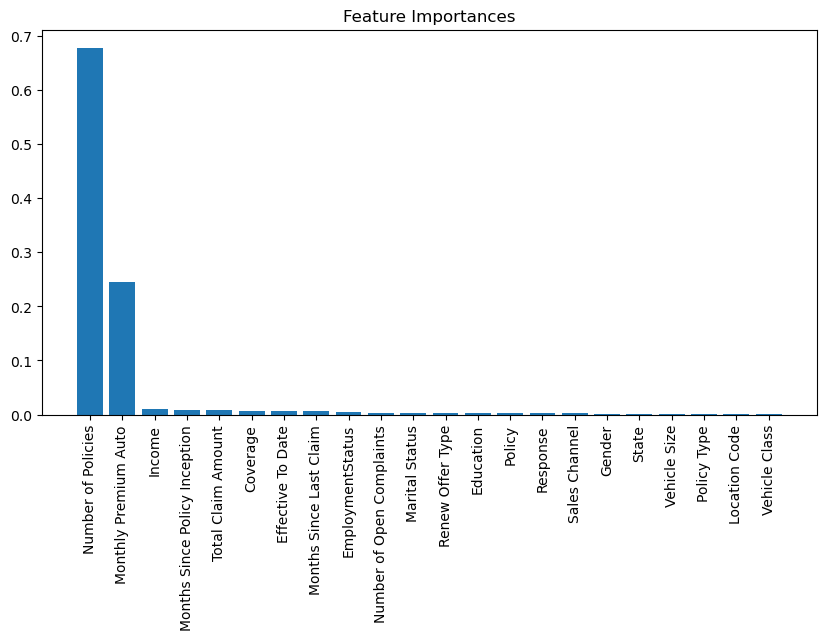

In [149]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_

# Sort the features based on importance scores
indices = importances.argsort()[::-1]

# Print the top 10 features
top_features = X.columns[indices][:10]
print("Top 10 Features:")
print(top_features)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

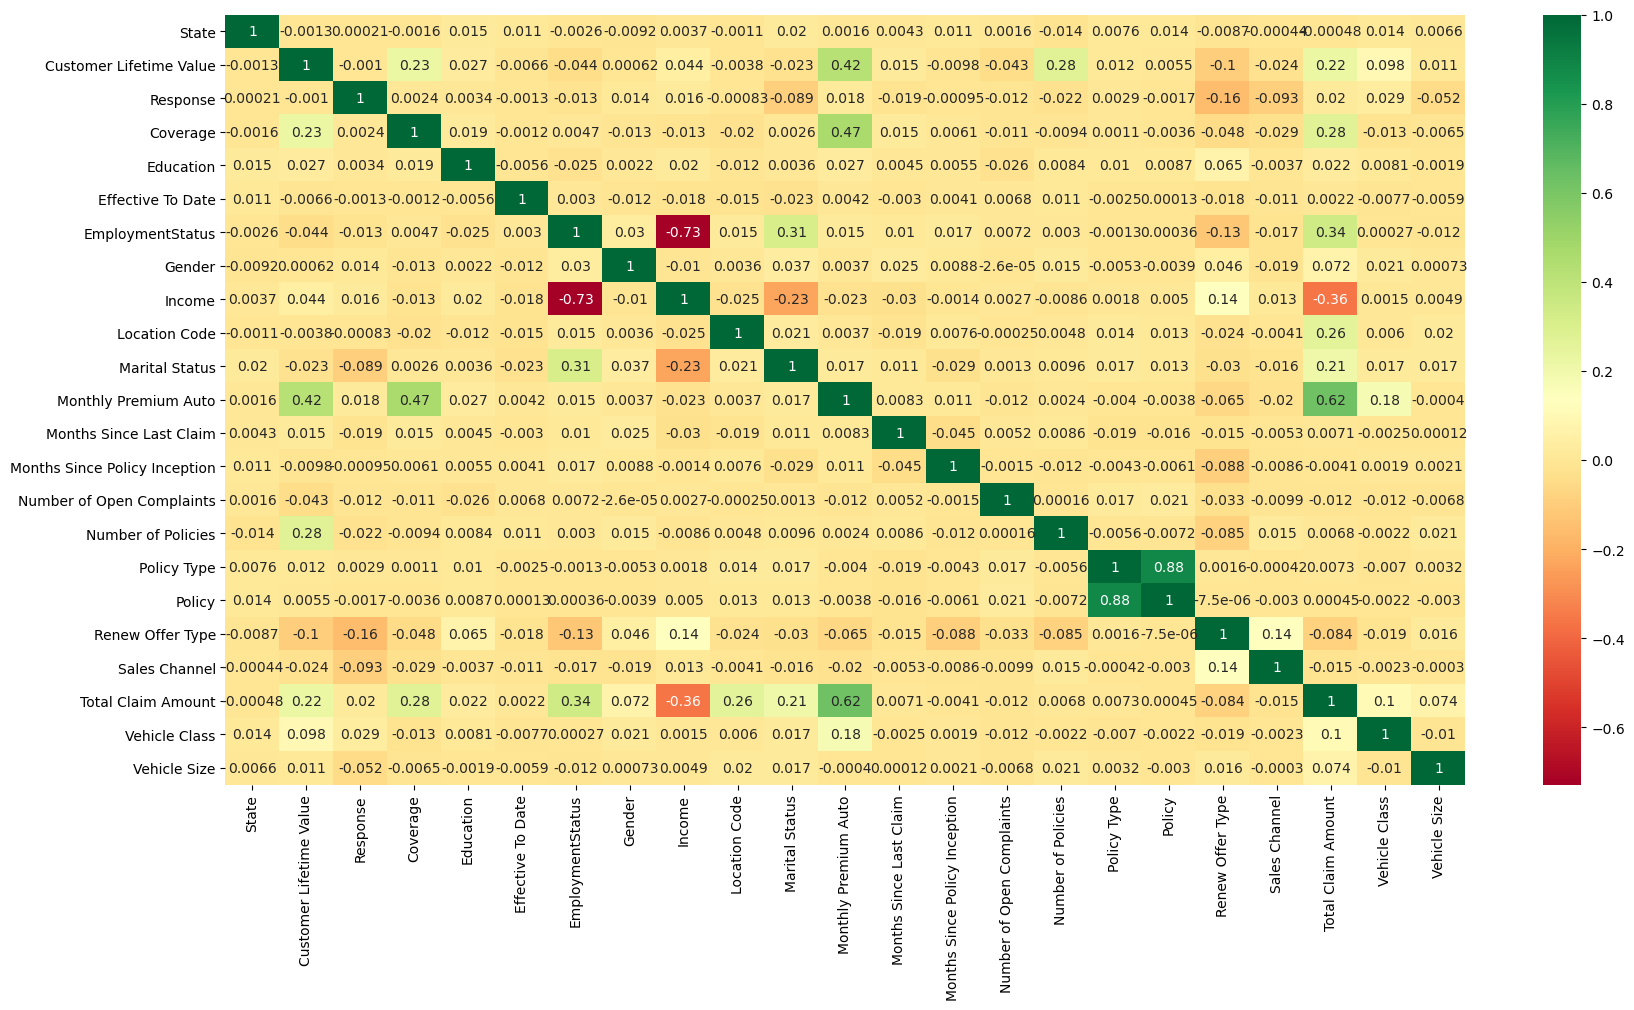

In [153]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###### Seems that the feature selection models differ a bit in which feature is the most important. For the first test I will keep: 
- Number of Policies (high in all both tests)
- Monthly Premium Auto (high in all both tests and the highest in the correlation)
- Income (high in two tests)
- Coverage (High in the correlation)
- Total Claim Amount (High in the correlation)

The above chart indicates that Total Claim Amount, Coverage, and Monthly Premium Auto are correlated. In such cases, it is essential to choose a suitable machine learning algorithm that can handle correlated features, like Regularized Linear Regression or Gradient Boosting.

## Approach 1 - Predictive Modeling<a name="approach1"></a>

#### Step 1 - Split the dataset in train and test<a name="split"></a>

In [160]:
from sklearn.model_selection import train_test_split

#First try with the 5 most important features
X_5 = df[['Total Claim Amount', 'Monthly Premium Auto', 'Income', 'Coverage', 'Number of Policies']] #independent columns chosen 
y = df['Customer Lifetime Value']    #target column 

#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

In [161]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6136, 5)
Shape of X_test is:  (2631, 5)
Shape of Y_train is:  (6136,)
Shape of y_test is:  (2631,)


#### Step 2 - Model Training<a name="training"></a>

##### Model 1 - Ridge Regression Model<a name="ridge"></a>

In [174]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
inner_cv = KFold(n_splits=4,shuffle=True,random_state=1)
outer_cv = KFold(n_splits=4,shuffle=True,random_state=1)
#Regularized Linear Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=inner_cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ridge_best_params = grid_search.best_params_
ridge_best_scores = -grid_search.best_score_

# print best hyperparameters and best score
print("Best Hyperparameters:", ridge_best_params)
print("Best Score:", ridge_best_scores)

Best Hyperparameters: {'alpha': 10}
Best Score: 0.24568429352482285


In [175]:
ridge_best = Ridge(**ridge_best_params)
ridge_best = ridge_best.fit(X_train, y_train)

##### Model 2 - Gradient Boosting Model<a name="gb"></a>

In [189]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(alpha=0.1)

# Set the hyperparameters to tune
parameters = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.5]}

grid_search = GridSearchCV(estimator=gb, 
                           param_grid=parameters, 
                           cv=inner_cv,
                           scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)

gb_best_params = grid_search.best_params_
gb_best_scores = -grid_search.best_score_

# print best hyperparameters and best score
print("Best Hyperparameters:", gb_best_params)
print("Best Score:", gb_best_scores)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Best Score: 0.0229444844052792


In [190]:
gb_best = GradientBoostingRegressor(**gb_best_params)
gb_best = gb_best.fit(X_train, y_train)

##### Model 3 - Neural Network Model<a name="nn"></a>

In [192]:
from sklearn.neural_network import MLPRegressor

# Define neural network model
model = MLPRegressor(activation='relu', solver='adam', max_iter=1000)

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=inner_cv, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

nn_best_params = grid_search.best_params_
nn_best_scores = -grid_search.best_score_

# print best hyperparameters and best score
print("Best Hyperparameters:", nn_best_params)
print("Best Score:", nn_best_scores)

Best Hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}
Best Score: 0.027117545882313583


In [194]:
nn_best = MLPRegressor(**nn_best_params)
nn_best = nn_best.fit(X_train, y_train)

#### Step 3 - Model Selection<a name="selection"></a>

In [184]:
from sklearn.model_selection import cross_val_score
ridge_score = cross_val_score(ridge_best,X=X_train,y=y_train,cv=outer_cv,scoring='neg_mean_squared_error')
-ridge_score.mean()

0.24568429352482285

In [191]:
gb_score = cross_val_score(gb_best,X=X_train,y=y_train,cv=outer_cv,scoring='neg_mean_squared_error')
-gb_score.mean()

0.022963179226951867

In [195]:
nn_score = cross_val_score(nn_best,X=X_train,y=y_train,cv=outer_cv,scoring='neg_mean_squared_error')
-nn_score.mean()

0.031459095590038864

#### Step 4 - Best Model Analysis

###### According to the result, the gradient boosting model is the best model.

R-squared score: 0.938
Mean squared error: 0.021


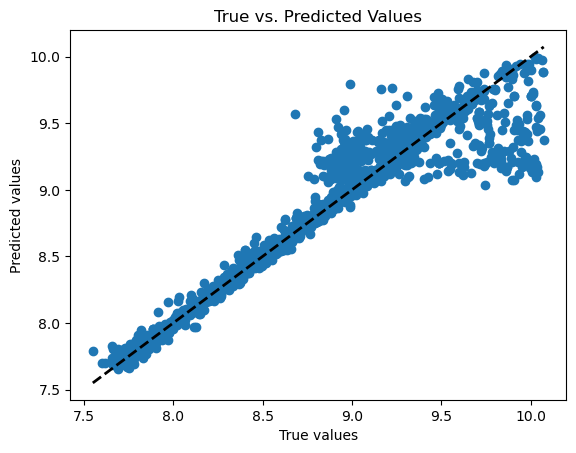

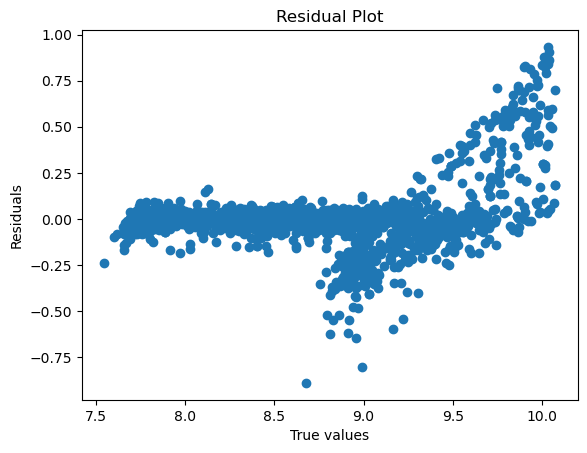

In [199]:
from sklearn.metrics import r2_score
y_pred = gb_best.predict(X_test)

# Calculate R-squared score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("R-squared score: {:.3f}".format(r2))
print("Mean squared error: {:.3f}".format(mse))

# Plot the true values and predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs. Predicted Values')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()